# Assingment - Evaluating Clusters

<b>1.</b> Get the silhoutte coefficient of the two cluster k-means solution. You'll notice that the silhoutte coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that <b>the silhoutte score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2).fit_transform(X_std)

In [3]:
def plot_kmeans(cluster):
    kmeans = KMeans(n_clusters=cluster, random_state=123)
    model = kmeans.fit(X_std)
    labels = model.labels_
    y_kmeans = kmeans.predict(X_std)
    print("{} Clusters Silhouette Score: {:.3f}".format(cluster, silhouette_score(X_std, labels, metric='euclidean')))
    
    plt.scatter(pca[:, 0], pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

2 Clusters Silhouette Score: 0.582


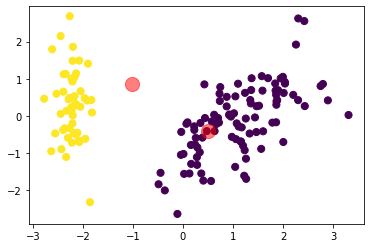

In [4]:
plot_kmeans(2)

3 Clusters Silhouette Score: 0.460


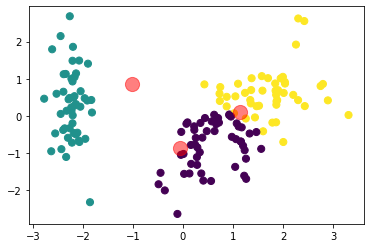

In [5]:
plot_kmeans(3)

Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are. In two cluster model, the silhouette score is higher because the data set is separated better.

<b>2.</b> In this assignment, you work with the heart disease data which you worked in the assignment of the previous checkpoint. 

* Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one? 
* Get ARI scores for each of the previous solutions. Which model is the best? 
* Get silhoutte coefficients for each of the previous solutions. Which model is the best?

In [6]:
df_heart_attack = pd.read_csv('risk_of_heart_attack2.csv')
df_heart_attack.drop(0, inplace=True)

In [7]:
X = df_heart_attack.drop("num", axis=1)
y = df_heart_attack["num"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=0.5, random_state=11)

In [8]:
y_pred = pd.DataFrame()

for counter, data in enumerate([(X_half1, X_pcahalf1),(X_half2, X_pcahalf2)]):
    y_pred['pca_f1_sample'+ str(counter)] = data[1][:,0]
    y_pred['pca_f2_sample'+ str(counter)] = data[1][:,1]
    
    for nclust in range(2,5):
        pred = KMeans(n_clusters=nclust, random_state=11).fit_predict(data[counter])
        y_pred['clust'+str(nclust)+'_sample'+str(counter)] = pred

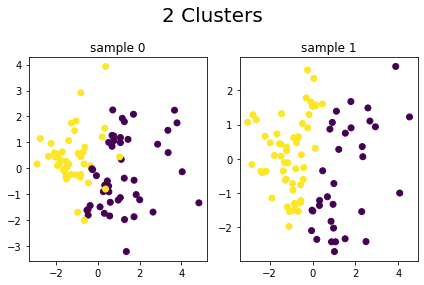

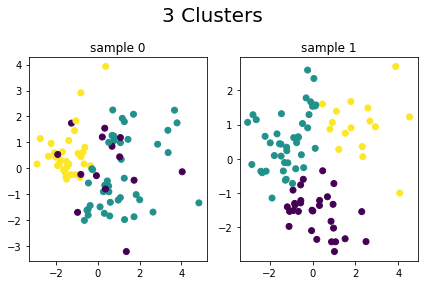

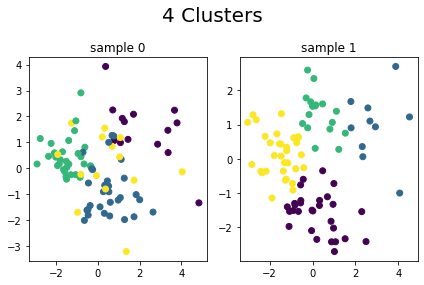

In [9]:
for cluster in range(2, 5):
    f, axarr = plt.subplots(1, 2)

    for i in range(2):
        x_sub = y_pred['pca_f1_sample{}'.format(i)]
        y_sub = y_pred['pca_f2_sample{}'.format(i)]
        
        c = y_pred['clust{}_sample{}'.format(cluster, i)]

        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

It appears that out of all cluster numbers the two cluster solution yield consistent results in terms of cluster center and cluster shape.

In [10]:
for i in range(2,5):
    km = KMeans(n_clusters=i, random_state=123)
    full_pred = km.fit_predict(X_std)
    model = km.fit(X_std)
    labels = model.labels_
    print('{} Clusters'.format(i))
    print('-----------------------')
    print("RI Score: {:.3f}".format(rand_score(y, full_pred)))
    print("ARI Score: {:.3f}".format(adjusted_rand_score(y, full_pred)))
    print("Silhouette Score: {:.3f}\n".format(silhouette_score(X_std, labels, metric='euclidean')))

2 Clusters
-----------------------
RI Score: 0.548
ARI Score: 0.075
Silhouette Score: 0.147

3 Clusters
-----------------------
RI Score: 0.422
ARI Score: 0.058
Silhouette Score: 0.115

4 Clusters
-----------------------
RI Score: 0.383
ARI Score: 0.062
Silhouette Score: 0.126



Looking at the results we can say that 2 clusters model is the best. But in general all of our results are close to randomness which is bad for our models.